In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.preprocessing import StandardScaler


    df = pd.read_csv(r"exoplanet_catalogue.csv")

# modify the dataframe to only contain planets detected via primary transit and radial velocity
det_types = ["Primary Transit", "Radial Velocity"]

new_rows = []

for i in det_types:
    for index, row in df.iterrows():
        if i in row['detection_type']:
            new_row = row
            new_row['detection_type'] = i
            new_rows.append(new_row) 

df1 = pd.DataFrame(new_rows)
print(f"{len(df1)} rows in the dataframe after filtering for primary transit and radial velocity detection types")

# getting our features of interest
features = ["mass", "radius", "orbital_period", "semi_major_axis", "star_mass", "star_radius", "star_teff"]
feat_dict = {}

for i in features:
    feat_dict[i] = df1[i].dropna().values
    print(f"{len(feat_dict[i])} non-nan values in {i} feature")


5769 rows in the dataframe after filtering for primary transit and radial velocity detection types
2828 non-nan values in mass feature
4549 non-nan values in radius feature
5750 non-nan values in orbital_period feature
4208 non-nan values in semi_major_axis feature
5371 non-nan values in star_mass feature
5395 non-nan values in star_radius feature
5541 non-nan values in star_teff feature


In [2]:
df_drop = df.dropna(subset=['mass','radius','semi_major_axis'])
print(df_drop.shape)

print(df_drop[['mass','radius','semi_major_axis']].describe())

df = df_drop.copy()

(1587, 98)
              mass       radius  semi_major_axis
count  1587.000000  1587.000000      1587.000000
mean      3.643391     0.803736        33.123803
std      10.439107     0.608531       320.842727
min       0.000190     0.026000         0.001160
25%       0.028600     0.233100         0.040300
50%       0.395000     0.884000         0.057980
75%       1.448000     1.200000         0.111800
max      73.400000     6.900000      6900.000000


Summary statistics of our exoplanet data:
              mass       radius  semi_major_axis
count  1587.000000  1587.000000      1587.000000
mean      3.643391     0.803736        33.123803
std      10.439107     0.608531       320.842727
min       0.000190     0.026000         0.001160
25%       0.028600     0.233100         0.040300
50%       0.395000     0.884000         0.057980
75%       1.448000     1.200000         0.111800
max      73.400000     6.900000      6900.000000

Probability density for example planets:
Jupiter-like (Mass: 1.0, Radius: 1.0, SMA: 1.0): 0.408990
Small planet (Mass: 0.1, Radius: 0.3, SMA: 0.4): 0.556257
Large distant planet (Mass: 5.0, Radius: 2.0, SMA: 5.0): 0.027492

Predicted probability density for test planet:
Mass: 0.8, Radius: 0.9, SMA: 1.2
Probability density: 0.349277


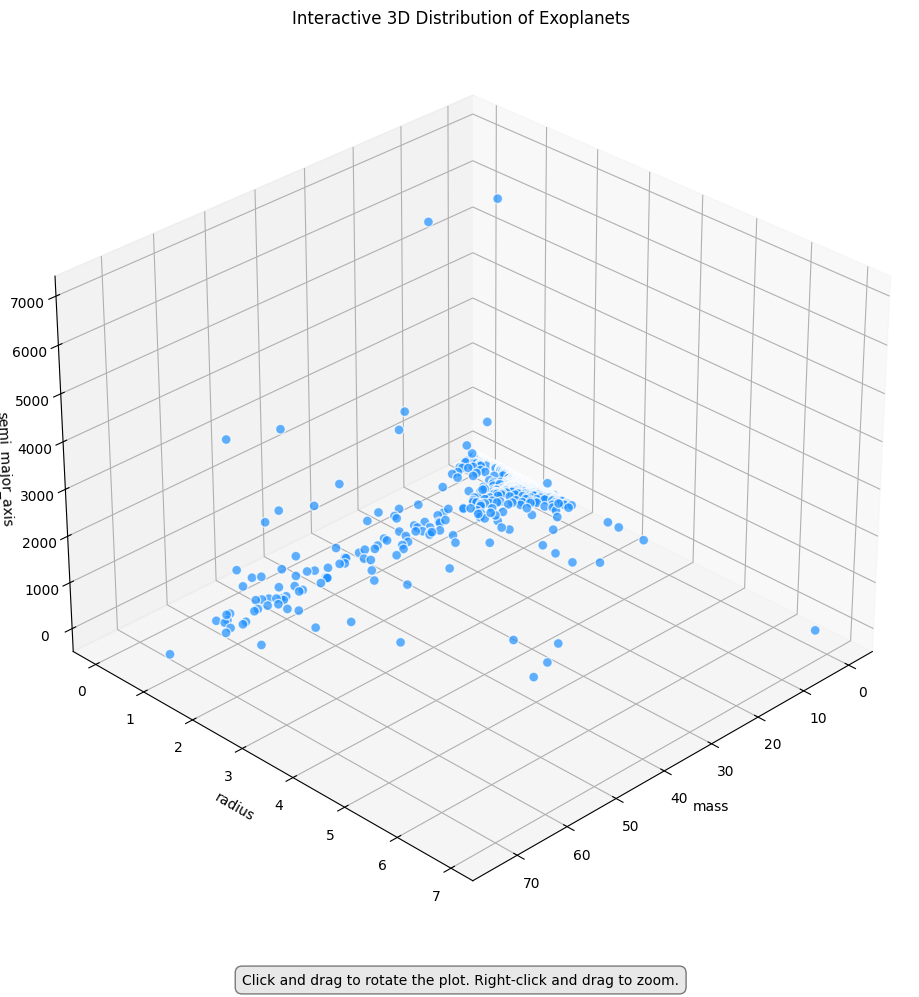

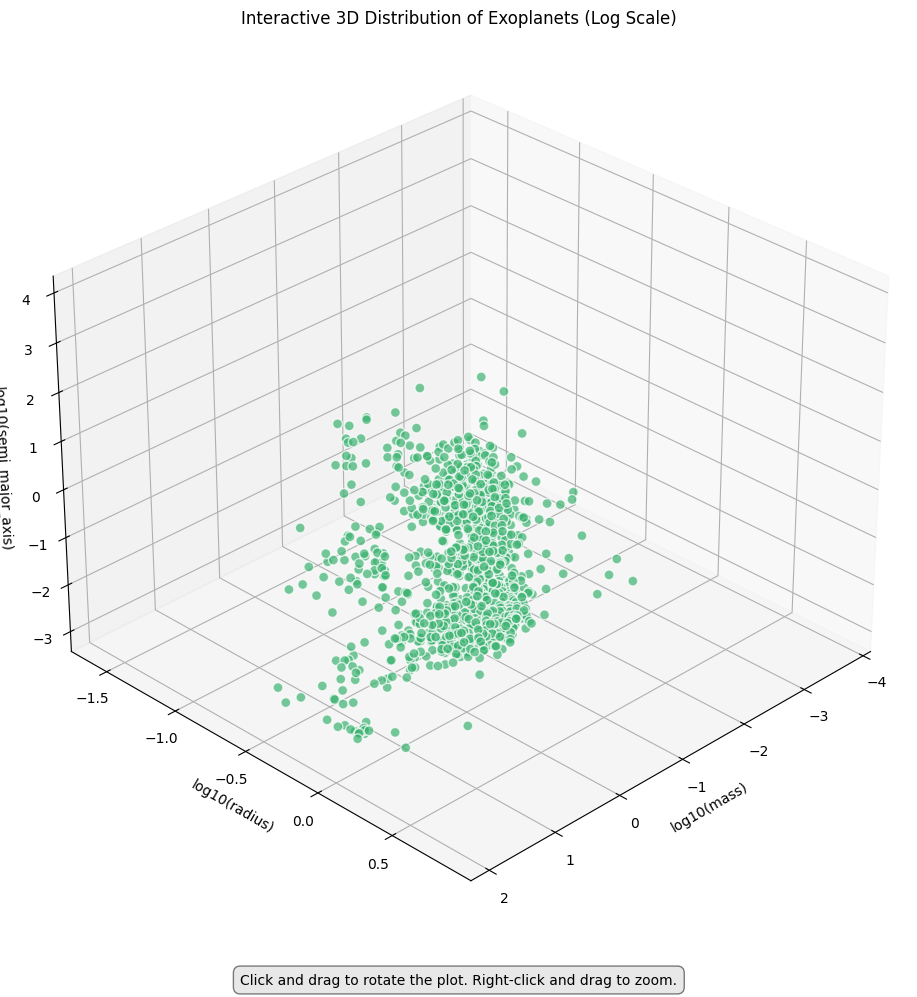

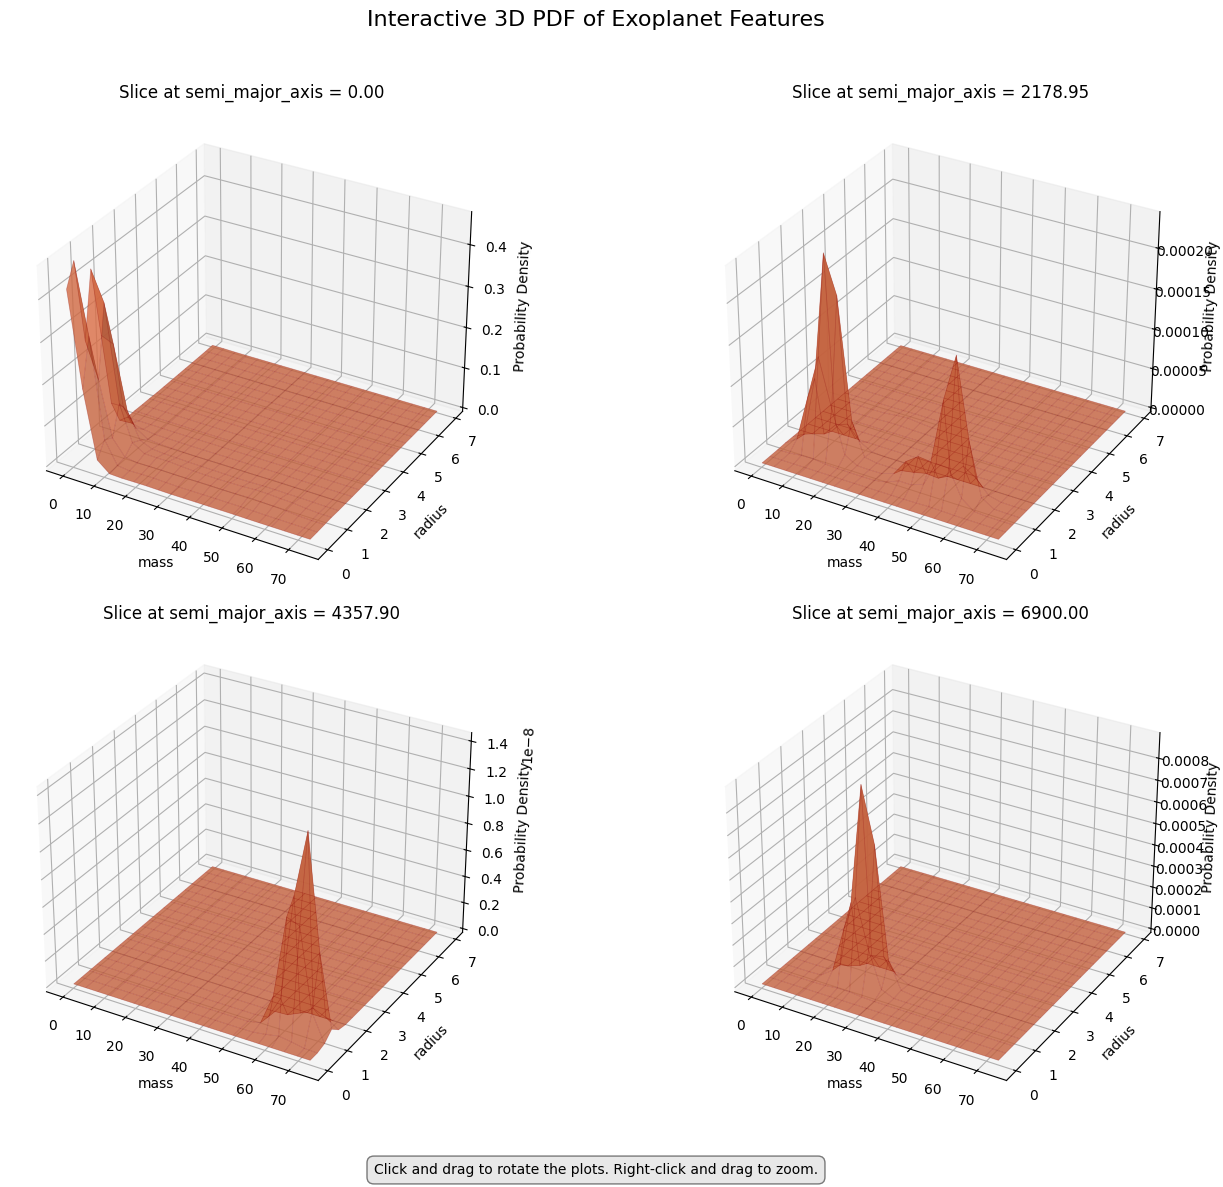

<Figure size 1200x1000 with 0 Axes>

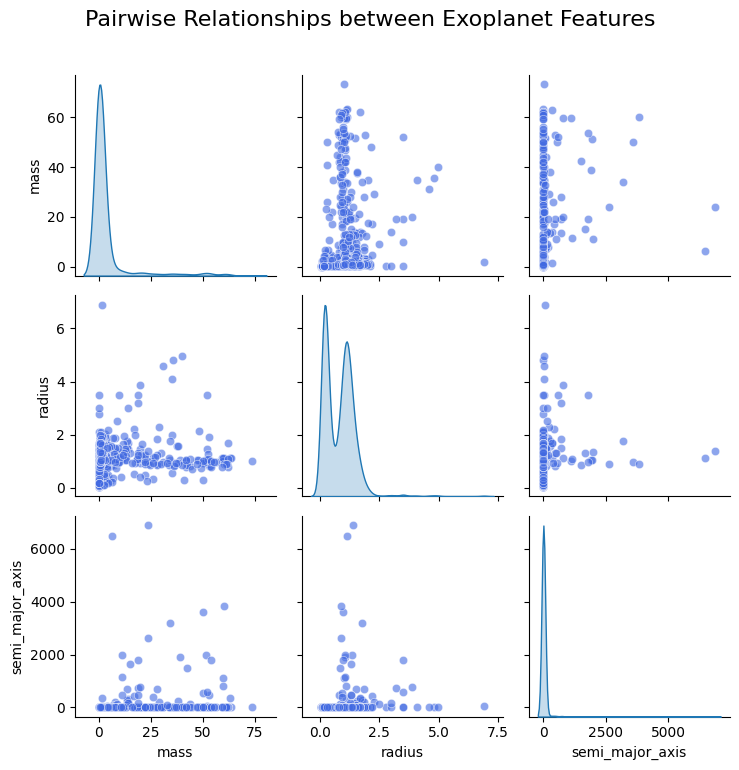

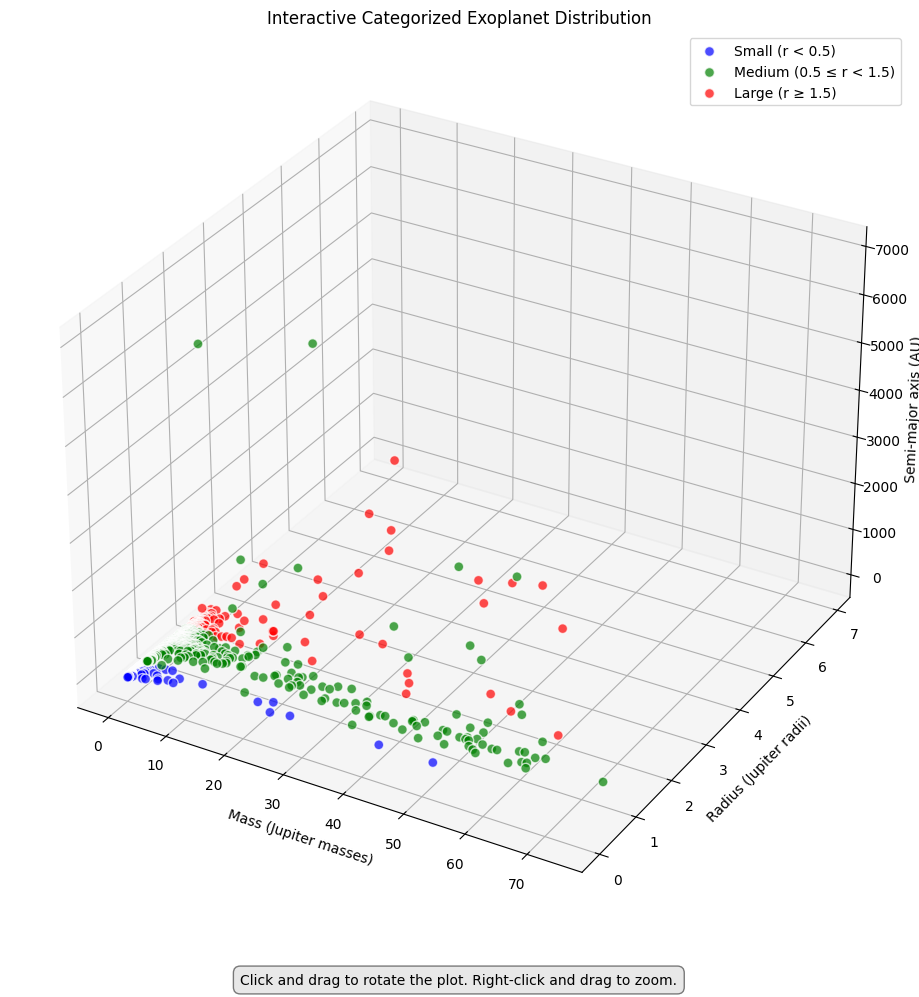


All plots are now interactive. Click and drag to rotate, right-click and drag to zoom.
Keep the plot windows open to maintain interactivity.


In [3]:
# Print summary statistics
print("Summary statistics of our exoplanet data:")
print(df[['mass', 'radius', 'semi_major_axis']].describe())

# Function to create an interactive 3D scatter plot without color gradients
def plot_interactive_3d_scatter(df, x_col, y_col, z_col, title="Interactive 3D Distribution of Exoplanets"):
    """
    Create an interactive 3D scatter plot of exoplanet data without color gradients.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing exoplanet data
    x_col, y_col, z_col : str
        Column names for the x, y, and z axes
    title : str
        Plot title
    """
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot with a single color (no gradient)
    scatter = ax.scatter(
        df[x_col], 
        df[y_col], 
        df[z_col],
        color='dodgerblue',  # Single color instead of gradient
        alpha=0.7,
        s=50,
        edgecolor='w'
    )
    
    # Set labels and title
    ax.set_xlabel(f'{x_col}')
    ax.set_ylabel(f'{y_col}')
    ax.set_zlabel(f'{z_col}')
    ax.set_title(title)
    
    # Add grid
    ax.grid(True)
    
    # Set a better viewing angle
    ax.view_init(elev=30, azim=45)
    
    # Add annotation for interactivity instructions
    plt.figtext(0.5, 0.01, "Click and drag to rotate the plot. Right-click and drag to zoom.", 
                ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    return fig, ax

# Create the interactive 3D scatter plot
fig, ax = plot_interactive_3d_scatter(df, 'mass', 'radius', 'semi_major_axis', 
                          title="Interactive 3D Distribution of Exoplanets")

# Function to create an interactive 3D scatter plot with log scales but no color gradients
def plot_interactive_3d_scatter_log(df, x_col, y_col, z_col, title="Interactive 3D Distribution of Exoplanets (Log Scale)"):
    """Create an interactive 3D scatter plot with logarithmic scales but no color gradients."""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot with log-transformed data and single color
    scatter = ax.scatter(
        np.log10(df[x_col]), 
        np.log10(df[y_col]), 
        np.log10(df[z_col]),
        color='mediumseagreen',  # Single color instead of gradient
        alpha=0.7,
        s=50,
        edgecolor='w'
    )
    
    # Set labels and title
    ax.set_xlabel(f'log10({x_col})')
    ax.set_ylabel(f'log10({y_col})')
    ax.set_zlabel(f'log10({z_col})')
    ax.set_title(title)
    
    # Add grid
    ax.grid(True)
    
    # Set a better viewing angle
    ax.view_init(elev=30, azim=45)
    
    # Add annotation for interactivity instructions
    plt.figtext(0.5, 0.01, "Click and drag to rotate the plot. Right-click and drag to zoom.", 
                ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    return fig, ax

# Create the interactive log-scale 3D scatter plot
fig_log, ax_log = plot_interactive_3d_scatter_log(df, 'mass', 'radius', 'semi_major_axis',
                                       title="Interactive 3D Distribution of Exoplanets (Log Scale)")

# Now let's model the 3D PDF
# First, we'll standardize the data to work better with KDE
def model_3d_pdf(df, feature_cols):
    """
    Model a 3D probability density function using KDE.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data
    feature_cols : list of str
        Column names for the features to model
    
    Returns:
    --------
    kde : scipy.stats.gaussian_kde
        Fitted KDE model
    scaler : sklearn.preprocessing.StandardScaler
        Fitted scaler for transforming new data
    """
    # Extract the feature data
    data = df[feature_cols].values
    
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Fit KDE to the scaled data
    kde = stats.gaussian_kde(data_scaled.T)
    
    return kde, scaler

# Model the 3D PDF
feature_cols = ['mass', 'radius', 'semi_major_axis']
kde, scaler = model_3d_pdf(df, feature_cols)

# Function to plot an interactive KDE visualization without color gradients
def plot_interactive_3d_pdf(kde, scaler, feature_cols, grid_points=20, title="Interactive 3D PDF of Exoplanet Features"):
    """
    Visualize the 3D PDF with interactive plots without color gradients.
    
    Parameters:
    -----------
    kde : scipy.stats.gaussian_kde
        Fitted KDE model
    scaler : sklearn.preprocessing.StandardScaler
        Fitted scaler used to transform the data
    feature_cols : list of str
        Names of the features
    grid_points : int
        Number of points in each dimension for the grid
    title : str
        Plot title
    """
    # Create a grid in the original feature space
    grid_mins = [df[col].min() for col in feature_cols]
    grid_maxs = [df[col].max() for col in feature_cols]
    
    # Create a slightly smaller grid to focus on the main density region
    grid_x = np.linspace(grid_mins[0], grid_maxs[0], grid_points)
    grid_y = np.linspace(grid_mins[1], grid_maxs[1], grid_points)
    grid_z = np.linspace(grid_mins[2], grid_maxs[2], grid_points)
    
    # Create 3D meshgrid
    X, Y = np.meshgrid(grid_x, grid_y)
    
    # Prepare figure
    fig = plt.figure(figsize=(15, 12))
    
    # Create several slices through the 3D PDF at different z values
    n_slices = 4
    z_indices = np.linspace(0, grid_points-1, n_slices).astype(int)
    
    for i, z_idx in enumerate(z_indices):
        z_val = grid_z[z_idx]
        
        # Create a 2D grid of points for this slice
        points = np.vstack([X.ravel(), Y.ravel(), np.full_like(X.ravel(), z_val)]).T
        
        # Scale the points
        points_scaled = scaler.transform(points)
        
        # Evaluate the PDF at the scaled points
        pdf_values = kde(points_scaled.T)
        
        # Reshape to the original grid shape
        Z = np.reshape(pdf_values, X.shape)
        
        # Create a subplot
        ax = fig.add_subplot(2, 2, i+1, projection='3d')
        
        # Plot the PDF as a surface with a single color (no gradient)
        surf = ax.plot_surface(X, Y, Z, color='coral', alpha=0.8, 
                              linewidth=0, antialiased=True)
        
        # Add wireframe for better visibility of the surface shape
        ax.plot_wireframe(X, Y, Z, color='darkred', alpha=0.3, linewidth=0.5)
        
        # Add labels
        ax.set_xlabel(feature_cols[0])
        ax.set_ylabel(feature_cols[1])
        ax.set_zlabel('Probability Density')
        ax.set_title(f'Slice at {feature_cols[2]} = {z_val:.2f}')
    
    plt.suptitle(title, fontsize=16)
    # Add annotation for interactivity instructions
    plt.figtext(0.5, 0.01, "Click and drag to rotate the plots. Right-click and drag to zoom.", 
                ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.96])
    return fig

# Plot the interactive 3D PDF
pdf_fig = plot_interactive_3d_pdf(kde, scaler, feature_cols, grid_points=20)

# Function to evaluate the PDF at new data points
def evaluate_pdf(kde, scaler, new_data):
    """
    Evaluate the probability density for new data points.
    
    Parameters:
    -----------
    kde : scipy.stats.gaussian_kde
        Fitted KDE model
    scaler : sklearn.preprocessing.StandardScaler
        Fitted scaler
    new_data : array-like, shape (n_samples, n_features)
        New data points
    
    Returns:
    --------
    pdf_values : numpy.ndarray
        Probability density values
    """
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)
    
    # Evaluate the PDF
    pdf_values = kde(new_data_scaled.T)
    
    return pdf_values

# Example: Evaluate the PDF for a few example planets
example_planets = np.array([
    [1.0, 1.0, 1.0],  # Jupiter-like (mass, radius, semi-major axis)
    [0.1, 0.3, 0.4],  # Smaller planet
    [5.0, 2.0, 5.0]   # Large distant planet
])

# Label the examples
example_labels = ['Jupiter-like', 'Small planet', 'Large distant planet']

# Evaluate the PDF for the examples
pdf_values = evaluate_pdf(kde, scaler, example_planets)

# Print the results
print("\nProbability density for example planets:")
for i, (example, label, pdf) in enumerate(zip(example_planets, example_labels, pdf_values)):
    print(f"{label} (Mass: {example[0]:.1f}, Radius: {example[1]:.1f}, SMA: {example[2]:.1f}): {pdf:.6f}")

# Let's also create a pairplot with single colors (no gradients)
plt.figure(figsize=(12, 10))
sns.pairplot(df[feature_cols], diag_kind='kde', plot_kws={'color': 'royalblue', 'alpha': 0.6})
plt.suptitle("Pairwise Relationships between Exoplanet Features", y=1.02, fontsize=16)
plt.tight_layout()

# Interactive scatter plot categorizing planets by size 
def plot_categorized_exoplanets(df):
    """Create an interactive scatter plot with planets categorized by size."""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define size categories
    small = df['radius'] < 0.5
    medium = (df['radius'] >= 0.5) & (df['radius'] < 1.5)
    large = df['radius'] >= 1.5
    
    # Plot each category with a different color
    ax.scatter(df.loc[small, 'mass'], df.loc[small, 'radius'], df.loc[small, 'semi_major_axis'], 
              color='blue', label='Small (r < 0.5)', alpha=0.7, s=50, edgecolor='w')
    ax.scatter(df.loc[medium, 'mass'], df.loc[medium, 'radius'], df.loc[medium, 'semi_major_axis'], 
              color='green', label='Medium (0.5 ≤ r < 1.5)', alpha=0.7, s=50, edgecolor='w')
    ax.scatter(df.loc[large, 'mass'], df.loc[large, 'radius'], df.loc[large, 'semi_major_axis'], 
              color='red', label='Large (r ≥ 1.5)', alpha=0.7, s=50, edgecolor='w')
    
    # Set labels and title
    ax.set_xlabel('Mass (Jupiter masses)')
    ax.set_ylabel('Radius (Jupiter radii)')
    ax.set_zlabel('Semi-major axis (AU)')
    ax.set_title('Interactive Categorized Exoplanet Distribution')
    
    # Add legend
    ax.legend()
    
    # Add grid
    ax.grid(True)
    
    # Add annotation for interactivity instructions
    plt.figtext(0.5, 0.01, "Click and drag to rotate the plot. Right-click and drag to zoom.", 
                ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    return fig, ax

# Create a categorized interactive plot
cat_fig, cat_ax = plot_categorized_exoplanets(df)

# Function to predict probability
def predict_probability(kde, scaler, mass, radius, sma):
    """
    Predict the probability density for a given exoplanet configuration.
    
    Parameters:
    -----------
    kde : scipy.stats.gaussian_kde
        Fitted KDE model
    scaler : sklearn.preprocessing.StandardScaler
        Fitted scaler
    mass : float
        Planet mass (in Jupiter masses)
    radius : float
        Planet radius (in Jupiter radii)
    sma : float
        Semi-major axis (in AU)
    
    Returns:
    --------
    float
        Probability density value
    """
    # Create input array
    input_data = np.array([[mass, radius, sma]])
    
    # Evaluate PDF
    return evaluate_pdf(kde, scaler, input_data)[0]

# Example usage
test_planet = {"mass": 0.8, "radius": 0.9, "semi_major_axis": 1.2}
probability = predict_probability(kde, scaler, 
                                 test_planet["mass"], 
                                 test_planet["radius"], 
                                 test_planet["semi_major_axis"])

print(f"\nPredicted probability density for test planet:")
print(f"Mass: {test_planet['mass']}, Radius: {test_planet['radius']}, SMA: {test_planet['semi_major_axis']}")
print(f"Probability density: {probability:.6f}")

# Show all plots in interactive mode 
plt.ion()  # Turn on interactive mode
plt.show()

print("\nAll plots are now interactive. Click and drag to rotate, right-click and drag to zoom.")
print("Keep the plot windows open to maintain interactivity.")

Summary statistics of our exoplanet data:
              mass       radius  semi_major_axis
count  1587.000000  1587.000000      1587.000000
mean      3.643391     0.803736        33.123803
std      10.439107     0.608531       320.842727
min       0.000190     0.026000         0.001160
25%       0.028600     0.233100         0.040300
50%       0.395000     0.884000         0.057980
75%       1.448000     1.200000         0.111800
max      73.400000     6.900000      6900.000000


C:\Users\arpan\AppData\Local\Temp\ipykernel_52324\1772026028.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 8))



Predicted probability density for test planet:
Mass: 0.8, Radius: 0.9, SMA: 1.2
Probability density: 0.349277

Note: If the plots aren't interactive, you may need to install the ipympl package:
Run: pip install ipympl
Then restart your Jupyter kernel and run this code again.


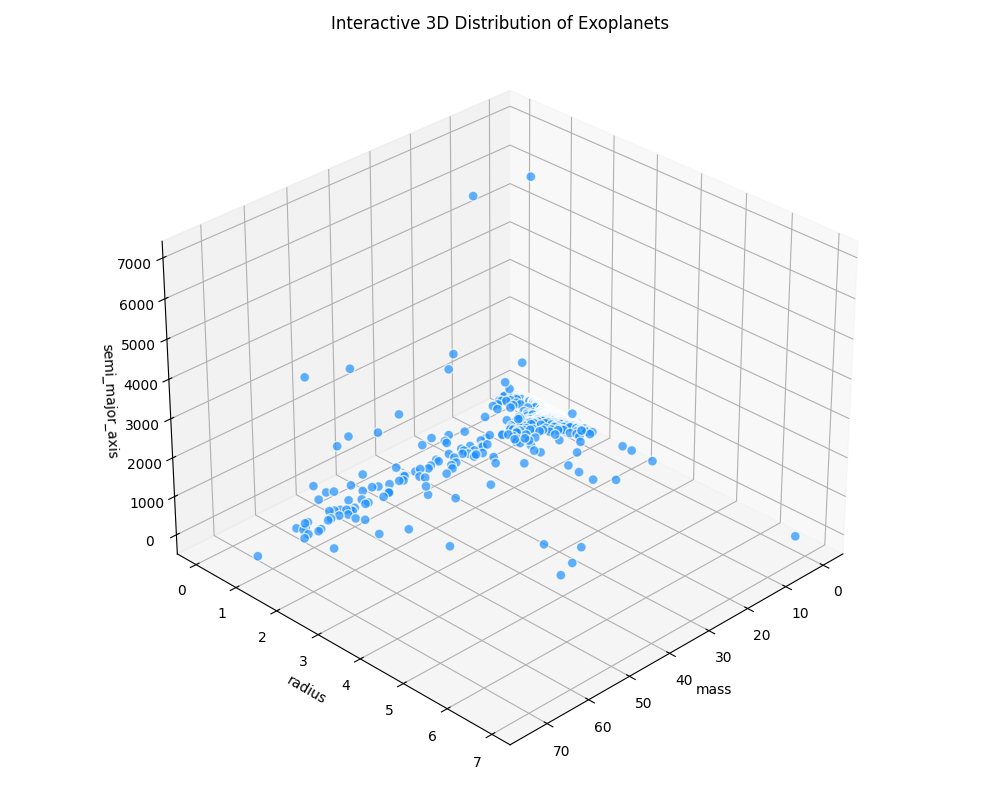

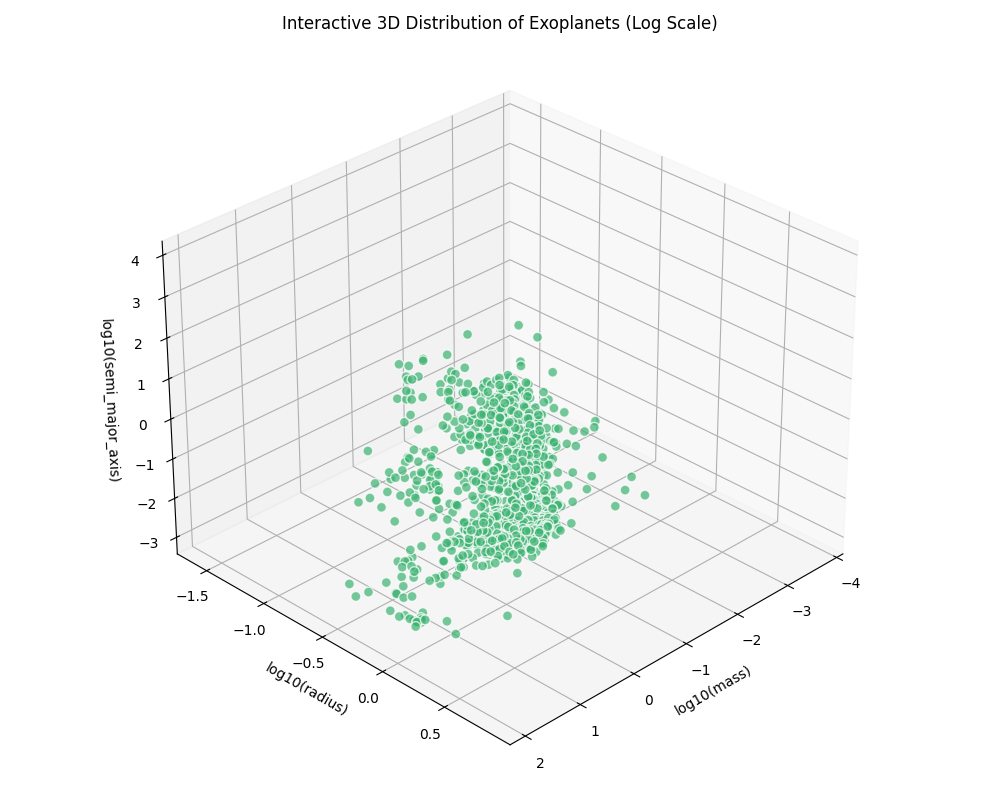

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Enable interactive plots in Jupyter specifically
%matplotlib widget



# Print summary statistics
print("Summary statistics of our exoplanet data:")
print(df[['mass', 'radius', 'semi_major_axis']].describe())

# Function to create an interactive 3D scatter plot without color gradients for Jupyter
def plot_interactive_3d_scatter(df, x_col, y_col, z_col, title="Interactive 3D Distribution of Exoplanets"):
    """
    Create an interactive 3D scatter plot of exoplanet data without color gradients.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing exoplanet data
    x_col, y_col, z_col : str
        Column names for the x, y, and z axes
    title : str
        Plot title
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot with a single color (no gradient)
    scatter = ax.scatter(
        df[x_col], 
        df[y_col], 
        df[z_col],
        color='dodgerblue',  # Single color instead of gradient
        alpha=0.7,
        s=50,
        edgecolor='w'
    )
    
    # Set labels and title
    ax.set_xlabel(f'{x_col}')
    ax.set_ylabel(f'{y_col}')
    ax.set_zlabel(f'{z_col}')
    ax.set_title(title)
    
    # Add grid
    ax.grid(True)
    
    # Set a better viewing angle
    ax.view_init(elev=30, azim=45)
    
    plt.tight_layout()
    return fig, ax

# Create the interactive 3D scatter plot - will display inline in Jupyter
fig, ax = plot_interactive_3d_scatter(df, 'mass', 'radius', 'semi_major_axis', 
                          title="Interactive 3D Distribution of Exoplanets")

# Function to create an interactive 3D scatter plot with log scales but no color gradients
def plot_interactive_3d_scatter_log(df, x_col, y_col, z_col, title="Interactive 3D Distribution of Exoplanets (Log Scale)"):
    """Create an interactive 3D scatter plot with logarithmic scales but no color gradients."""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot with log-transformed data and single color
    scatter = ax.scatter(
        np.log10(df[x_col]), 
        np.log10(df[y_col]), 
        np.log10(df[z_col]),
        color='mediumseagreen',  # Single color instead of gradient
        alpha=0.7,
        s=50,
        edgecolor='w'
    )
    
    # Set labels and title
    ax.set_xlabel(f'log10({x_col})')
    ax.set_ylabel(f'log10({y_col})')
    ax.set_zlabel(f'log10({z_col})')
    ax.set_title(title)
    
    # Add grid
    ax.grid(True)
    
    # Set a better viewing angle
    ax.view_init(elev=30, azim=45)
    
    plt.tight_layout()
    return fig, ax

# Create the interactive log-scale 3D scatter plot
fig_log, ax_log = plot_interactive_3d_scatter_log(df, 'mass', 'radius', 'semi_major_axis',
                                       title="Interactive 3D Distribution of Exoplanets (Log Scale)")

# Now let's model the 3D PDF
# First, we'll standardize the data to work better with KDE
def model_3d_pdf(df, feature_cols):
    """
    Model a 3D probability density function using KDE.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data
    feature_cols : list of str
        Column names for the features to model
    
    Returns:
    --------
    kde : scipy.stats.gaussian_kde
        Fitted KDE model
    scaler : sklearn.preprocessing.StandardScaler
        Fitted scaler for transforming new data
    """
    # Extract the feature data
    data = df[feature_cols].values
    
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Fit KDE to the scaled data
    kde = stats.gaussian_kde(data_scaled.T)
    
    return kde, scaler

# # Model the 3D PDF
# feature_cols = ['mass', 'radius', 'semi_major_axis']
# kde, scaler = model_3d_pdf(df, feature_cols)

# Function to plot an interactive KDE visualization without color gradients
def plot_interactive_3d_pdf(kde, scaler, feature_cols, grid_points=15, title="Interactive 3D PDF of Exoplanet Features"):
    """
    Visualize the 3D PDF with interactive plots without color gradients.
    
    Parameters:
    -----------
    kde : scipy.stats.gaussian_kde
        Fitted KDE model
    scaler : sklearn.preprocessing.StandardScaler
        Fitted scaler used to transform the data
    feature_cols : list of str
        Names of the features
    grid_points : int
        Number of points in each dimension for the grid
    title : str
        Plot title
    """
    # Create a grid in the original feature space
    grid_mins = [df[col].min() for col in feature_cols]
    grid_maxs = [df[col].max() for col in feature_cols]
    
    # Create a slightly smaller grid to focus on the main density region
    grid_x = np.linspace(grid_mins[0], grid_maxs[0], grid_points)
    grid_y = np.linspace(grid_mins[1], grid_maxs[1], grid_points)
    grid_z = np.linspace(grid_mins[2], grid_maxs[2], grid_points)
    
    # Create 3D meshgrid
    X, Y = np.meshgrid(grid_x, grid_y)
    
    # Create several slices through the 3D PDF at different z values
    n_slices = 4
    z_indices = np.linspace(0, grid_points-1, n_slices).astype(int)
    
    # Create subplots - one for each slice
    for i, z_idx in enumerate(z_indices):
        z_val = grid_z[z_idx]
        
        # Create a new figure for each slice for better interactivity in Jupyter
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        
        # Create a 2D grid of points for this slice
        points = np.vstack([X.ravel(), Y.ravel(), np.full_like(X.ravel(), z_val)]).T
        
        # Scale the points
        points_scaled = scaler.transform(points)
        
        # Evaluate the PDF at the scaled points
        pdf_values = kde(points_scaled.T)
        
        # Reshape to the original grid shape
        Z = np.reshape(pdf_values, X.shape)
        
        # Plot the PDF as a surface with a single color (no gradient)
        surf = ax.plot_surface(X, Y, Z, color='coral', alpha=0.8, 
                              linewidth=0, antialiased=True)
        
        # Add wireframe for better visibility of the surface shape
        ax.plot_wireframe(X, Y, Z, color='darkred', alpha=0.3, linewidth=0.5)
        
        # Add labels
        ax.set_xlabel(feature_cols[0])
        ax.set_ylabel(feature_cols[1])
        ax.set_zlabel('Probability Density')
        ax.set_title(f'PDF Slice at {feature_cols[2]} = {z_val:.2f}')
        
        plt.tight_layout()
        print(f"Displaying slice {i+1} of {n_slices}")
        plt.show()
    
    return None

# # Plot the interactive 3D PDF - each slice will display separately for better interaction
# print("Generating 3D PDF slices...")
# plot_interactive_3d_pdf(kde, scaler, feature_cols, grid_points=15)

# Function to evaluate the PDF at new data points
def evaluate_pdf(kde, scaler, new_data):
    """
    Evaluate the probability density for new data points.
    
    Parameters:
    -----------
    kde : scipy.stats.gaussian_kde
        Fitted KDE model
    scaler : sklearn.preprocessing.StandardScaler
        Fitted scaler
    new_data : array-like, shape (n_samples, n_features)
        New data points
    
    Returns:
    --------
    pdf_values : numpy.ndarray
        Probability density values
    """
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)
    
    # Evaluate the PDF
    pdf_values = kde(new_data_scaled.T)
    
    return pdf_values

# # Example: Evaluate the PDF for a few example planets
# example_planets = np.array([
#     [1.0, 1.0, 1.0],  # Jupiter-like (mass, radius, semi-major axis)
#     [0.1, 0.3, 0.4],  # Smaller planet
#     [5.0, 2.0, 5.0]   # Large distant planet
# ])

# # Label the examples
# example_labels = ['Jupiter-like', 'Small planet', 'Large distant planet']

# # Evaluate the PDF for the examples
# pdf_values = evaluate_pdf(kde, scaler, example_planets)

# # Print the results
# print("\nProbability density for example planets:")
# for i, (example, label, pdf) in enumerate(zip(example_planets, example_labels, pdf_values)):
#     print(f"{label} (Mass: {example[0]:.1f}, Radius: {example[1]:.1f}, SMA: {example[2]:.1f}): {pdf:.6f}")

# # Let's also create a pairplot with single colors (no gradients)
# plt.figure(figsize=(10, 8))
# sns.pairplot(df[feature_cols], diag_kind='kde', plot_kws={'color': 'royalblue', 'alpha': 0.6})
# plt.suptitle("Pairwise Relationships between Exoplanet Features", y=1.02, fontsize=16)
# plt.tight_layout()
# plt.show()

# Interactive scatter plot categorizing planets by size 
def plot_categorized_exoplanets(df):
    """Create an interactive scatter plot with planets categorized by size."""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define size categories
    small = df['radius'] < 0.5
    medium = (df['radius'] >= 0.5) & (df['radius'] < 1.5)
    large = df['radius'] >= 1.5
    
    # Plot each category with a different color
    ax.scatter(df.loc[small, 'mass'], df.loc[small, 'radius'], df.loc[small, 'semi_major_axis'], 
              color='blue', label='Small (r < 0.5)', alpha=0.7, s=50, edgecolor='w')
    ax.scatter(df.loc[medium, 'mass'], df.loc[medium, 'radius'], df.loc[medium, 'semi_major_axis'], 
              color='green', label='Medium (0.5 ≤ r < 1.5)', alpha=0.7, s=50, edgecolor='w')
    ax.scatter(df.loc[large, 'mass'], df.loc[large, 'radius'], df.loc[large, 'semi_major_axis'], 
              color='red', label='Large (r ≥ 1.5)', alpha=0.7, s=50, edgecolor='w')
    
    # Set labels and title
    ax.set_xlabel('Mass (Jupiter masses)')
    ax.set_ylabel('Radius (Jupiter radii)')
    ax.set_zlabel('Semi-major axis (AU)')
    ax.set_title('Interactive Categorized Exoplanet Distribution')
    
    # Add legend
    ax.legend()
    
    # Add grid
    ax.grid(True)
    
    plt.tight_layout()
    return fig, ax

# # Create a categorized interactive plot
# cat_fig, cat_ax = plot_categorized_exoplanets(df)
# plt.show()

# Function to predict probability
def predict_probability(kde, scaler, mass, radius, sma):
    """
    Predict the probability density for a given exoplanet configuration.
    
    Parameters:
    -----------
    kde : scipy.stats.gaussian_kde
        Fitted KDE model
    scaler : sklearn.preprocessing.StandardScaler
        Fitted scaler
    mass : float
        Planet mass (in Jupiter masses)
    radius : float
        Planet radius (in Jupiter radii)
    sma : float
        Semi-major axis (in AU)
    
    Returns:
    --------
    float
        Probability density value
    """
    # Create input array
    input_data = np.array([[mass, radius, sma]])
    
    # Evaluate PDF
    return evaluate_pdf(kde, scaler, input_data)[0]

# Example usage
test_planet = {"mass": 0.8, "radius": 0.9, "semi_major_axis": 1.2}
probability = predict_probability(kde, scaler, 
                                 test_planet["mass"], 
                                 test_planet["radius"], 
                                 test_planet["semi_major_axis"])

print(f"\nPredicted probability density for test planet:")
print(f"Mass: {test_planet['mass']}, Radius: {test_planet['radius']}, SMA: {test_planet['semi_major_axis']}")
print(f"Probability density: {probability:.6f}")

print("\nNote: If the plots aren't interactive, you may need to install the ipympl package:")
print("Run: pip install ipympl")
print("Then restart your Jupyter kernel and run this code again.")